In [1]:
import keras
from keras.datasets import mnist
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 27s 2us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

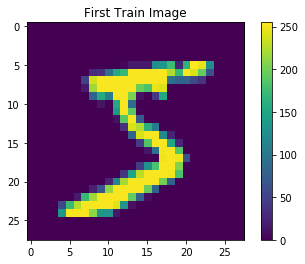

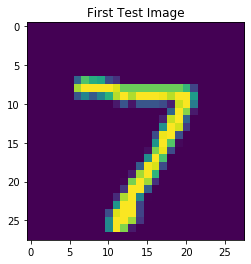

In [8]:
plt.figure()
plt.title('First Train Image');
plt.imshow(train_images[0]);
plt.colorbar()
plt.grid(False)
plt.show()
plt.title('First Test Image');
plt.imshow(test_images[0])

# Building Tensorflow Network

In [11]:
# Multiclass categorical classification, using Dense
network = models.Sequential();

In [12]:
# First layer is downshaping 28X28 image to a 512 tensor vector, relu is max(0, input)
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)));

In [13]:
# Adding the last layer downshaping the output of previous layer to 10 (0-9) digits
# The output of this layer is merely a probablistic distribution, hence using softmax activation function
network.add(layers.Dense(10, activation='softmax'))

In [14]:
# View the network
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the network
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model

In [16]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [17]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
validation_images = train_images[:10000]
actual_train_images = train_images[10000:]
validation_labels = train_labels[:10000]
actual_train_labels = train_labels[10000:]
history = network.fit(actual_train_images, actual_train_labels, 
                      epochs=5, 
                      batch_size=128, 
                      validation_data=(validation_images, validation_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 4s 83us/step - loss: 0.2777 - accuracy: 0.9179 - val_loss: 0.1570 - val_accuracy: 0.9546
Epoch 2/5
50000/50000 [==============================] - 4s 86us/step - loss: 0.1149 - accuracy: 0.9658 - val_loss: 0.1018 - val_accuracy: 0.9693
Epoch 3/5
50000/50000 [==============================] - 4s 74us/step - loss: 0.0751 - accuracy: 0.9782 - val_loss: 0.0998 - val_accuracy: 0.9697
Epoch 4/5
50000/50000 [==============================] - 4s 71us/step - loss: 0.0548 - accuracy: 0.9832 - val_loss: 0.0764 - val_accuracy: 0.9769
Epoch 5/5
50000/50000 [==============================] - 4s 73us/step - loss: 0.0400 - accuracy: 0.9878 - val_loss: 0.0826 - val_accuracy: 0.9747


In [19]:
# History object
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

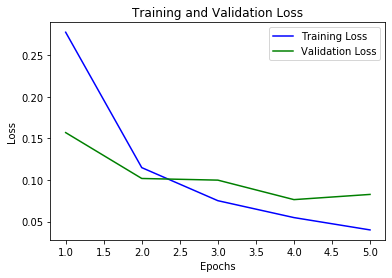

In [20]:
# Loss plotting - Taining vs Validation
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
# Clear the plot
plt.clf()

<Figure size 432x288 with 0 Axes>

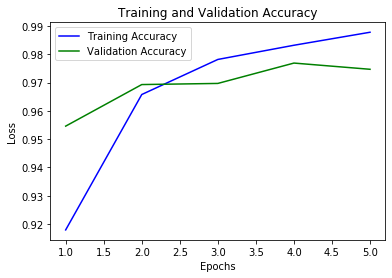

In [23]:
# Accuracy plotting - Training vs Validation
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# Test accuracy over 10K samples
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Expected Accuracy : ', test_acc)

10000/10000 [==============================] - 1s 57us/step
Expected Accuracy :  0.9764999747276306


# Prediction

In [33]:
predictions = network.predict(test_images)
print(predictions.shape)
print('Probablistic distribution of the first digit prediction: \n' + str(predictions[0]))

(10000, 10)
Probablistic distribution of the first digit prediction: 
[8.1946773e-08 1.7066124e-10 1.4910203e-06 1.8602017e-05 4.1735317e-11
 6.9754333e-07 3.6557295e-14 9.9997330e-01 1.9426382e-08 5.7827579e-06]


In [34]:
predicted_value = np.argmax(predictions[0])
print('Predicted picture : ' + str(predicted_value))
print('Actual picture under test: ' + str(np.argmax(test_labels[0])))

Predicted picture : 7
Actual picture under test: 7
